# Artificial Intelligence - Fall 2020 - Laboratory 04 : State-Space Search


## Introduction

State-space search or pathfinding requires a sequence of actions in the space of states \begin{equation*} s_{0} \mapsto s_{f} \end{equation*} which can be:
* explored, 
* discovered(frontier), 
* unexplored.

**A\*** is the most widespread option for this type of problems in AI: the algorithm finds the shortest path and uses a heuristic to guide itself.

## Today's Challenge

Given a bidimensional map with various obstacles, find the shortest path between two positions within it.

_Note:_ The **labyrinth** variable will play the role of the bidimensional map.

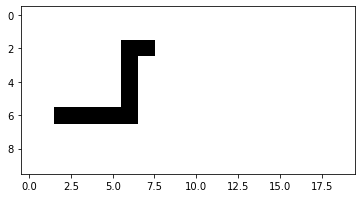

In [70]:
# Dimensions of the map.
height = 10
width = 20

# Bidimensional map as a list of lists.
# The empty cells are marked with 0, while blocks of walls with 1.
labyrinth = [[0 for c in range(width)] for r in range(height)]

for r in range(2, 7):
    labyrinth[r][6] = 1
    labyrinth[6][r] = 1
labyrinth[2][7] = 1

# Display labyrinth
%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.imshow(labyrinth, cmap='Greys', interpolation='nearest');

## Advanced functions

To simplify the iteration process, we can use: 

* `lambda`, the anonymous function which always returns an expression and has the following syntax:

```python
    lambda arguments: expression
```

In [19]:
# For this problem, we want to find the path 
# from the start point

start = (5, 5)

# to the end point.
final = (8, 8)

# Let us verify if having a list of tuples,
# their position corresponds to the endpoint.

# First, the lambda function:
is_final = lambda position: position == final

Lambda plays the role of an input argument in other functions, such as:

* `map`, which passes each element of the given iterable to a function:

```python
    map(function, iterable)
```

In [20]:
# Second, the map function:
list(map(is_final, [(1,1), (3, 6), (8, 8)]))

[False, False, True]

* `filter` can easily select the values from a sequence with a certain property:

```python
    filter(function, sequence)
```

In [21]:
list(filter(is_final, [(1,1), (3, 6), (8, 8)]))

[(8, 8)]

## The A* algorithm

With the help of the following tasks, create the building blocks of the algorithm.

### Task 0

**a.** Given a certain position represented by a `tuple`, find if its location is valid.

While exploring the bidirectional map, be careful to:

* check if the available coordinates are inside the plane (0-height, 0-width),
* verify if the position is free and not occupied by an obstacle.

In [22]:
def verify_location(position):
    # extract coordinates
    (x, y) = position
    
    """TO DO"""
    if (x >= 0 and x < height) and (y >= 0 and y < width) and labyrinth[x][y] != 1:
            return True
    
    
    return False

In [23]:
list(map(verify_location, [(-1,2), (height,3), (width,4), (5,5), (6,6), (0,9)])) 
# expected answer: [False, False, False, True, False, True]

[False, False, False, True, False, True]

**b.** Once you have verified the position, return its empty neighbours in a `list`.

Use both `filter` function and `verifiy_location` written above.

In [100]:
def get_neighbours(position):
    
    """TO DO"""
    result = []
    (x, y) = position
    
    result.append((x+1, y))
    result.append((x+1, y+1))
    result.append((x-1, y))
    result.append((x-1, y-1))
    result.append((x, y+1))
    result.append((x, y-1))
    
    
    return list(filter(verify_location, result))

In [101]:
[get_neighbours(p) for p in [(0,9), (5,5)]]
# expected answer: [[(1, 10), (0, 10), (1, 9), (0, 8), (1, 8)], [(4, 4), (4, 5), (5, 4)]]

[[(1, 9), (1, 10), (0, 10), (0, 8)], [(4, 5), (4, 4), (5, 4)]]

### Heuristic search

After checking the surroundings, we want to expand our frontier towards the goal, rather than searching for all possible directions.

### Task 1

**a.** Compute the _Euclidean distance_:

For two dimensions: 

\begin{equation*}
d(x, y) = \sqrt{(x_{1} - y_{1})^{2} + (x_{2} - y_{2})^{2}}
\end{equation*}

In [102]:
from math import sqrt

In [103]:
def euclidean_distance(x, y):
    
    """TO DO"""
    distance = sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)
    
    return distance

In [104]:
euclidean_distance((2,3), (4, 7))
# expected answer: 4.47213595499958

4.47213595499958

**b.** Compute the _Manhattan distance_:

For two dimensions: 

\begin{equation*}
d(x, y) = \left | x_{1} - x_{2} \right | +  \left | y_{1} - y_{2} \right |
\end{equation*}

In [105]:
def manhattan_distance(x, y):
    
    """TO DO"""
    distance = abs(x[0] - x[1]) + abs(y[0] - y[1])
    
    return distance

In [106]:
manhattan_distance((2,3), (4,0))
# expected answer: 5

5

To decide which location should be first checked from the _frontier_, we need to verify if the new possible route is better than the best previous one.

In practice, this could be accomplished using a **Priority Queue**. 

In [107]:
from heapq import heappop, heappush

priority_queue = []
heappush(priority_queue, ((1, 2), 'cost_so_far: 2'))
heappush(priority_queue, ((0, 1), 'cost_so_far: 1'))
heappush(priority_queue, ((1, 4), 'cost_so_far: 3'))

print(heappop(priority_queue))
print(heappop(priority_queue))
print(heappop(priority_queue))

((0, 1), 'cost_so_far: 1')
((1, 2), 'cost_so_far: 2')
((1, 4), 'cost_so_far: 3')


The frontier uses a priority queue for expansion and has the following structure: 

`frontier[(discovered_nodes_as_tuple), (estimated_cost, node)]`

Save the discovered nodes in a dictionary:

`d[new_node] = (parent, cost_so_far)`

* The movement between cells costs one unit and represents the `real cost g` which helps in measuring the actual distance.
* The estimated distance to the goal is given by the `heuristic function` defined before.

### Task 2

**a.** Implement **A\*** algorithm which receives as arguments the start node, the final node and the heuristic function.

In [108]:
from heapq import heappop, heappush

In [109]:
'''
    Nu prea am inteles structura lui frontier asa ca am schimbat un pic implementarea
'''
class Node:
    def __init__(self, position, parent):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0
    
    
    def __eq__(self, other):
        return self.position == other.position
    
    
    def __lt__(self, other):
        return (self.g + self.h) < (other.g + other.h)
    
    
    def __repr__(self):
        return ('({}, {})'.format(self.position, self.f))
        

def astar(start, end, h):
    open = []
    closed = []
    
    start_node = Node(start, None)
    end_node = Node(end, None)
    
    heappush(open, start_node)
    
    while open:
        current_node = heappop(open)
        #print(current_node)
        closed.append(current_node)
        
        if current_node == end_node:
            path = []
            while current_node != start_node:
                path.append(current_node.position)
                current_node = current_node.parent
            # reversed
            return path[::-1]
        
        neighbours = get_neighbours(current_node.position)
        
        for neighbour in neighbours:
            if labyrinth[neighbour[0]][neighbour[1]] == 1:
                continue
            
            next_node = Node(neighbour, current_node)
            
            if next_node in closed:
                continue
            
            # real cost
            next_node.g = 1
            
            # heuristic cost
            next_node.h = h(next_node.position, end_node.position)
            
            # total cost
            next_node.f = next_node.g + next_node.f
            
            if(add_to_open(open, next_node)):
                heappush(open, next_node)

    return None


def add_to_open(open, neighbour):
    for node in open:
        if neighbour == node and neighbour.f >= node.f:
            return False
    return True

**b.** Run the algorithm using different heuristics.

In [110]:
astar(start, final, euclidean_distance)

[(5, 4),
 (5, 3),
 (5, 2),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8)]

In [111]:
astar(start, final, manhattan_distance)

[(4, 4),
 (4, 3),
 (5, 3),
 (5, 2),
 (5, 1),
 (6, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (8, 8)]

**c.** Plot the cost map of this adventure:

```python
cost_map = [[discovered[(r,c)][1] if (r,c) in discovered else 0 for c in range(width)]for r in range(height)]
pyplot.imshow(cost_map , cmap='Greys', interpolation='nearest');
```

### Task 3

* Which heuristic function can be used in our problem, when we can move diagonally on the map?
* Which is the best one to use?
* What if we could only move in the 4 cardinal directions?

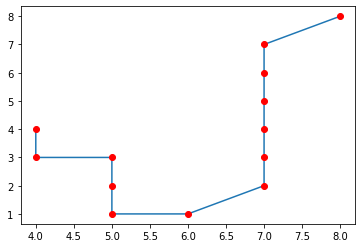

In [112]:
path = astar(start, final, manhattan_distance)
x_val = [x[0] for x in path]
y_val = [x[1] for x in path]

pyplot.plot(x_val,y_val)
pyplot.plot(x_val,y_val,'or')
pyplot.show()


#pyplot.imshow(cost_map , cmap='Greys', interpolation='nearest');

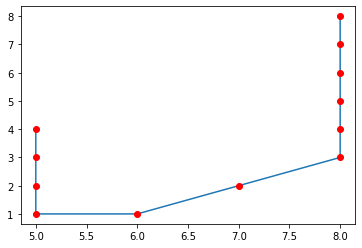

In [113]:
path = astar(start, final, euclidean_distance)
x_val = [x[0] for x in path]
y_val = [x[1] for x in path]

pyplot.plot(x_val,y_val)
pyplot.plot(x_val,y_val,'or')
pyplot.show()

In [ ]:
'''
Euclidean distance should be used if we move diagonally
If we use Manhattan it will overestimate -> bad heuristic

Only 4 directions: Manhattan
In our case Euclidean is better as shown
'''